### Installing requirements

In [ ]:
import os, sys
'''from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)'''

"from google.colab import drive\ndrive.mount('/content/drive')\nnb_path = '/content/notebooks'\nos.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)\nsys.path.insert(0,nb_path)"

In [ ]:
!pip install --target=$nb_path netket

### TFI using ANN from netket

In [ ]:
import netket as nk
from scipy.sparse.linalg import eigsh
from netket.operator.spin import sigmax, sigmaz
import jax
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import jax.numpy as jnp
import flax
from flax import nnx
import flax.linen as nn
import netket.nn as nknn
from tqdm import tqdm
import tracemalloc
import time
from google.colab import files
import json
#for those lines upload Ising.py and NNQS.py
from Ising import Ising
from NNQS import *

#cosmetics for plots and choice cpu/gpu for NNQS
mpl.rcParams.update({'font.size':55})
mpl.rcParams.update({'lines.linewidth':4})
os.environ["JAX_PLATFORM_NAME"] = "cpu"

In [ ]:
#this cell counts GD Energy for different sizes and record computational time
sizes = []
exact_gs_arr = []
exact_times = []
N_arr = range(2, 21, 2)
for N in tqdm(N_arr):
    chain = Ising(N=N, l = 1, periodic=True)
    eig_vals, eig_vecs = chain.find_exact_gs(full_out=True)
    exact_gs_arr.append(eig_vals)
    timexact_timeses.append(chain.exact_sol_time)

100%|██████████| 10/10 [00:58<00:00,  5.88s/it]


In [ ]:
#this cell saves energies and computational times to .json file
exact_t_data = dict.fromkeys(N_arr)
exact_gs_data = dict.fromkeys(N_arr)
for i, N in enumerate(N_arr):
    exact_t_data[N] = exact_times[i]
    exact_gs_data[N] = exact_gs_arr[i]

with open('exact_times.json', 'w') as fp:
    json.dump(exact_t_data, fp)
with open('exact_gs.json', 'w') as fp:
    json.dump(exact_gs_data, fp)

{2: 5.144923210144043, 4: 0.44850850105285645, 6: 0.31794071197509766, 8: 0.6103641986846924, 10: 0.733989953994751, 12: 0.6761798858642578, 14: 1.280825138092041, 16: 2.295001268386841, 18: 11.414023876190186, 20: 35.63497185707092}


In [ ]:
#this cell sets the alpha for NNQS and range for system size
alpha = 1
nnqs_N_arr = [int(i) for i in np.unique(np.array(list(range(2, 23, 2)) + list(range(2,103,10)), dtype=int))]
#nnqs_N_arr = [int(2**i) for i in range(6, 12)]

In [ ]:
#this cell runs NNQS for different system size and saving logs to .json files
nn_times = []
for N in nnqs_N_arr:
    chain = Ising(N=int(N), l = 1, periodic=True)
    sampler = nk.sampler.MetropolisLocal(chain.hi)
    nn_model = FFN(N=chain.N, alpha=alpha, rngs = nnx.Rngs(2))
    nn_vstate = nk.vqs.MCState(sampler, nn_model, n_samples=1024)
    log, nn_time = NNQS_run(chain, nn_vstate, n_iter=300)
    log.serialize(f'./log_{N}_{alpha}')
    files.download(f'./log_{N}_{alpha}.json')
    nn_times.append(nn_time)

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#this cell saves computationnal times for NNQS to .json file
nnqs_data = dict.fromkeys(nnqs_N_arr)
for i, N in enumerate(nnqs_N_arr):
    nnqs_data[N] = nn_times[i]
print(nnqs_data)

with open('nnqs1_times.json', 'w') as fp:
    json.dump(nnqs_data, fp)

{2: 8.719973802566528, 4: 10.512898921966553, 6: 10.851471185684204, 8: 12.082565307617188, 10: 17.977758646011353, 12: 19.228848218917847, 14: 22.570369005203247, 16: 27.152908086776733, 18: 28.53925323486328, 20: 30.712952375411987, 22: 32.73666501045227, 32: 44.83639335632324, 42: 63.0262234210968, 52: 85.37196135520935, 62: 110.96268105506897, 72: 129.64781427383423, 82: 170.41937565803528, 92: 198.74267959594727, 102: 231.72619009017944}


# Symmetric part

In [ ]:
#this cell runs Symmetric NNQS and saves logs to .json files
symm_times = []
for N in nnqs_N_arr:
    chain = Ising(N=int(N), l = 1, periodic=True)
    sampler = nk.sampler.MetropolisLocal(chain.hi)
    nn_model = SNN(N=chain.N, alpha=1, rngs=nnx.Rngs(0))
    nn_vstate = nk.vqs.MCState(sampler, nn_model, n_samples=1024)
    log, nn_time = NNQS_run(chain, nn_vstate, n_iter=300)
    log.serialize(f'./log_{N}_{alpha}_symm')
    files.download(f'./log_{N}_{alpha}_symm.json')
    symm_times.append(nn_time)

/usr/local/lib/python3.11/dist-packages/netket/graph/common_lattices.py:126: InitializePeriodicLatticeOnSmallLatticeWarning: 
You are attempting to define a lattice with length 2 in dimension 0 using periodic boundary condition.

Lattice with less than two sites in one direction does not support periodic boundary condition.
The behavior of the lattice is equivalent to an open boundary condition in this direction.

To avoid this warning, consider either using a lattice with more than two sites in the direction you want to be periodic,
or define the graph using :class:`~netket.graph.Graph` by adding the edges manually.


-------------------------------------------------------
For more detailed informations, visit the following link:
	 https://netket.readthedocs.io/en/latest/api/_generated/errors/netket.errors.InitializePeriodicLatticeOnSmallLatticeWarning.html
or the list of all common errors and warnings at
	 https://netket.readthedocs.io/en/latest/api/errors.html
----------------------

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/300 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#this cell saves computational times for Symmetric NNQS to .json file
nnqs_data = dict.fromkeys(nnqs_N_arr)
for i, N in enumerate(nnqs_N_arr):
    nnqs_data[N] = symm_times[i]
print(nnqs_data)

with open('nnqs1symm_times.json', 'w') as fp:
    json.dump(nnqs_data, fp)

{2: 8.709052801132202, 4: 9.469855546951294, 6: 13.492998600006104, 8: 16.377998113632202, 10: 18.60735321044922, 12: 21.271066904067993, 14: 22.198204040527344, 16: 28.033591985702515, 18: 29.13327717781067, 20: 32.086403608322144, 22: 34.960365772247314, 32: 50.585325956344604, 42: 72.9587025642395, 52: 106.51022863388062, 62: 140.38161826133728, 72: 173.74981570243835, 82: 231.58450436592102, 92: 283.56453371047974, 102: 360.6448345184326}


# Dependence on l

In [ ]:
#this cell study exact, NNQS and Symmetric NNQS ground state energies for different trasverse fields
#logs are saved to .json files

l_arr = np.linspace(0.1, 2.0, 30)
nnqs1_gs_l_arr = []
nnqs1symm_gs_l_arr = []
exact_gs_l_arr = []
N=102
alpha=1
for l in l_arr:
    chain = Ising(N=20, l = l, periodic=True)
    e_gs = chain.find_exact_gs()
    exact_gs_l_arr.append(e_gs)

    sampler = nk.sampler.MetropolisLocal(chain.hi)

    nn_model = FFN(N=chain.N, alpha=1, rngs=nnx.Rngs(0))
    nn_vstate = nk.vqs.MCState(sampler, nn_model, n_samples=1024)
    log, nn_time = NNQS_run(chain, nn_vstate, n_iter=300)
    log.serialize(f'./log_{N}_{alpha}_l_{l}')
    files.download(f'./log_{N}_{alpha}_l_{l}.json')
    nnqs1_gs_l_arr.append(log['Energy']['Mean'][-1])

    symm_model = SNN(N=chain.N, alpha=1, rngs=nnx.Rngs(0))
    symm_vstate = nk.vqs.MCState(sampler, symm_model, n_samples=1024)
    symm_log, symm_time = NNQS_run(chain, symm_vstate, n_iter=300)
    symm_log.serialize(f'./log_{N}_{alpha}_l_{l}_symm')
    files.download(f'./log_{N}_{alpha}_l_{l}_symm.json')
    nnqs1symm_gs_l_arr.append(symm_log['Energy']['Mean'][-1])

In [ ]:
#this cell saves exact solutions to .json file
data = dict.fromkeys(l_arr)
for i, N in enumerate(l_arr):
    data[N] = exact_gs_l_arr[i]
print(data)

with open('exact_gs_l.json', 'w') as fp:
    json.dump(data, fp)
files.download('exact_gs_l.json')

{np.float64(0.1): np.float64(-20.050031328431686), np.float64(0.16551724137931034): np.float64(-20.137215953050617), np.float64(0.23103448275862068): np.float64(-20.26778713924079), np.float64(0.296551724137931): np.float64(-20.442186531979917), np.float64(0.3620689655172413): np.float64(-20.661025834267665), np.float64(0.4275862068965517): np.float64(-20.925110663080027), np.float64(0.49310344827586206): np.float64(-21.235475421323716), np.float64(0.5586206896551723): np.float64(-21.59343481697974), np.float64(0.6241379310344827): np.float64(-22.000664279095982), np.float64(0.689655172413793): np.float64(-22.45934250111322), np.float64(0.7551724137931034): np.float64(-22.972455783482623), np.float64(0.8206896551724137): np.float64(-23.544538651456204), np.float64(0.886206896551724): np.float64(-24.18335775279808), np.float64(0.9517241379310344): np.float64(-24.901975996553865), np.float64(1.0172413793103448): np.float64(-25.714023747927435), np.float64(1.0827586206896551): np.float64(

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Feature maps

In [ ]:
#this cell runs the NNQS and Symmetric NNQS once
N = 20
alpha = 1
n_iter = 300
lr = 0.1

chain = Ising(N=N, l = 1, periodic=True)

nn_model = FFN(N=chain.N, alpha=alpha, rngs=nnx.Rngs(0))
nn_vstate = nk.vqs.MCState(sampler, nn_model, n_samples=1024)
log, nn_time = NNQS_run(chain, nn_vstate, n_iter=n_iter, learning_rate=lr)

symm_model = SNN(N=chain.N, alpha=alpha, rngs=nnx.Rngs(0))
symm_vstate = nk.vqs.MCState(sampler, symm_model, n_samples=1024)
symm_log, symm_time = NNQS_run(chain, symm_vstate, n_iter=n_iter, learning_rate=lr)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Symmetric model features')

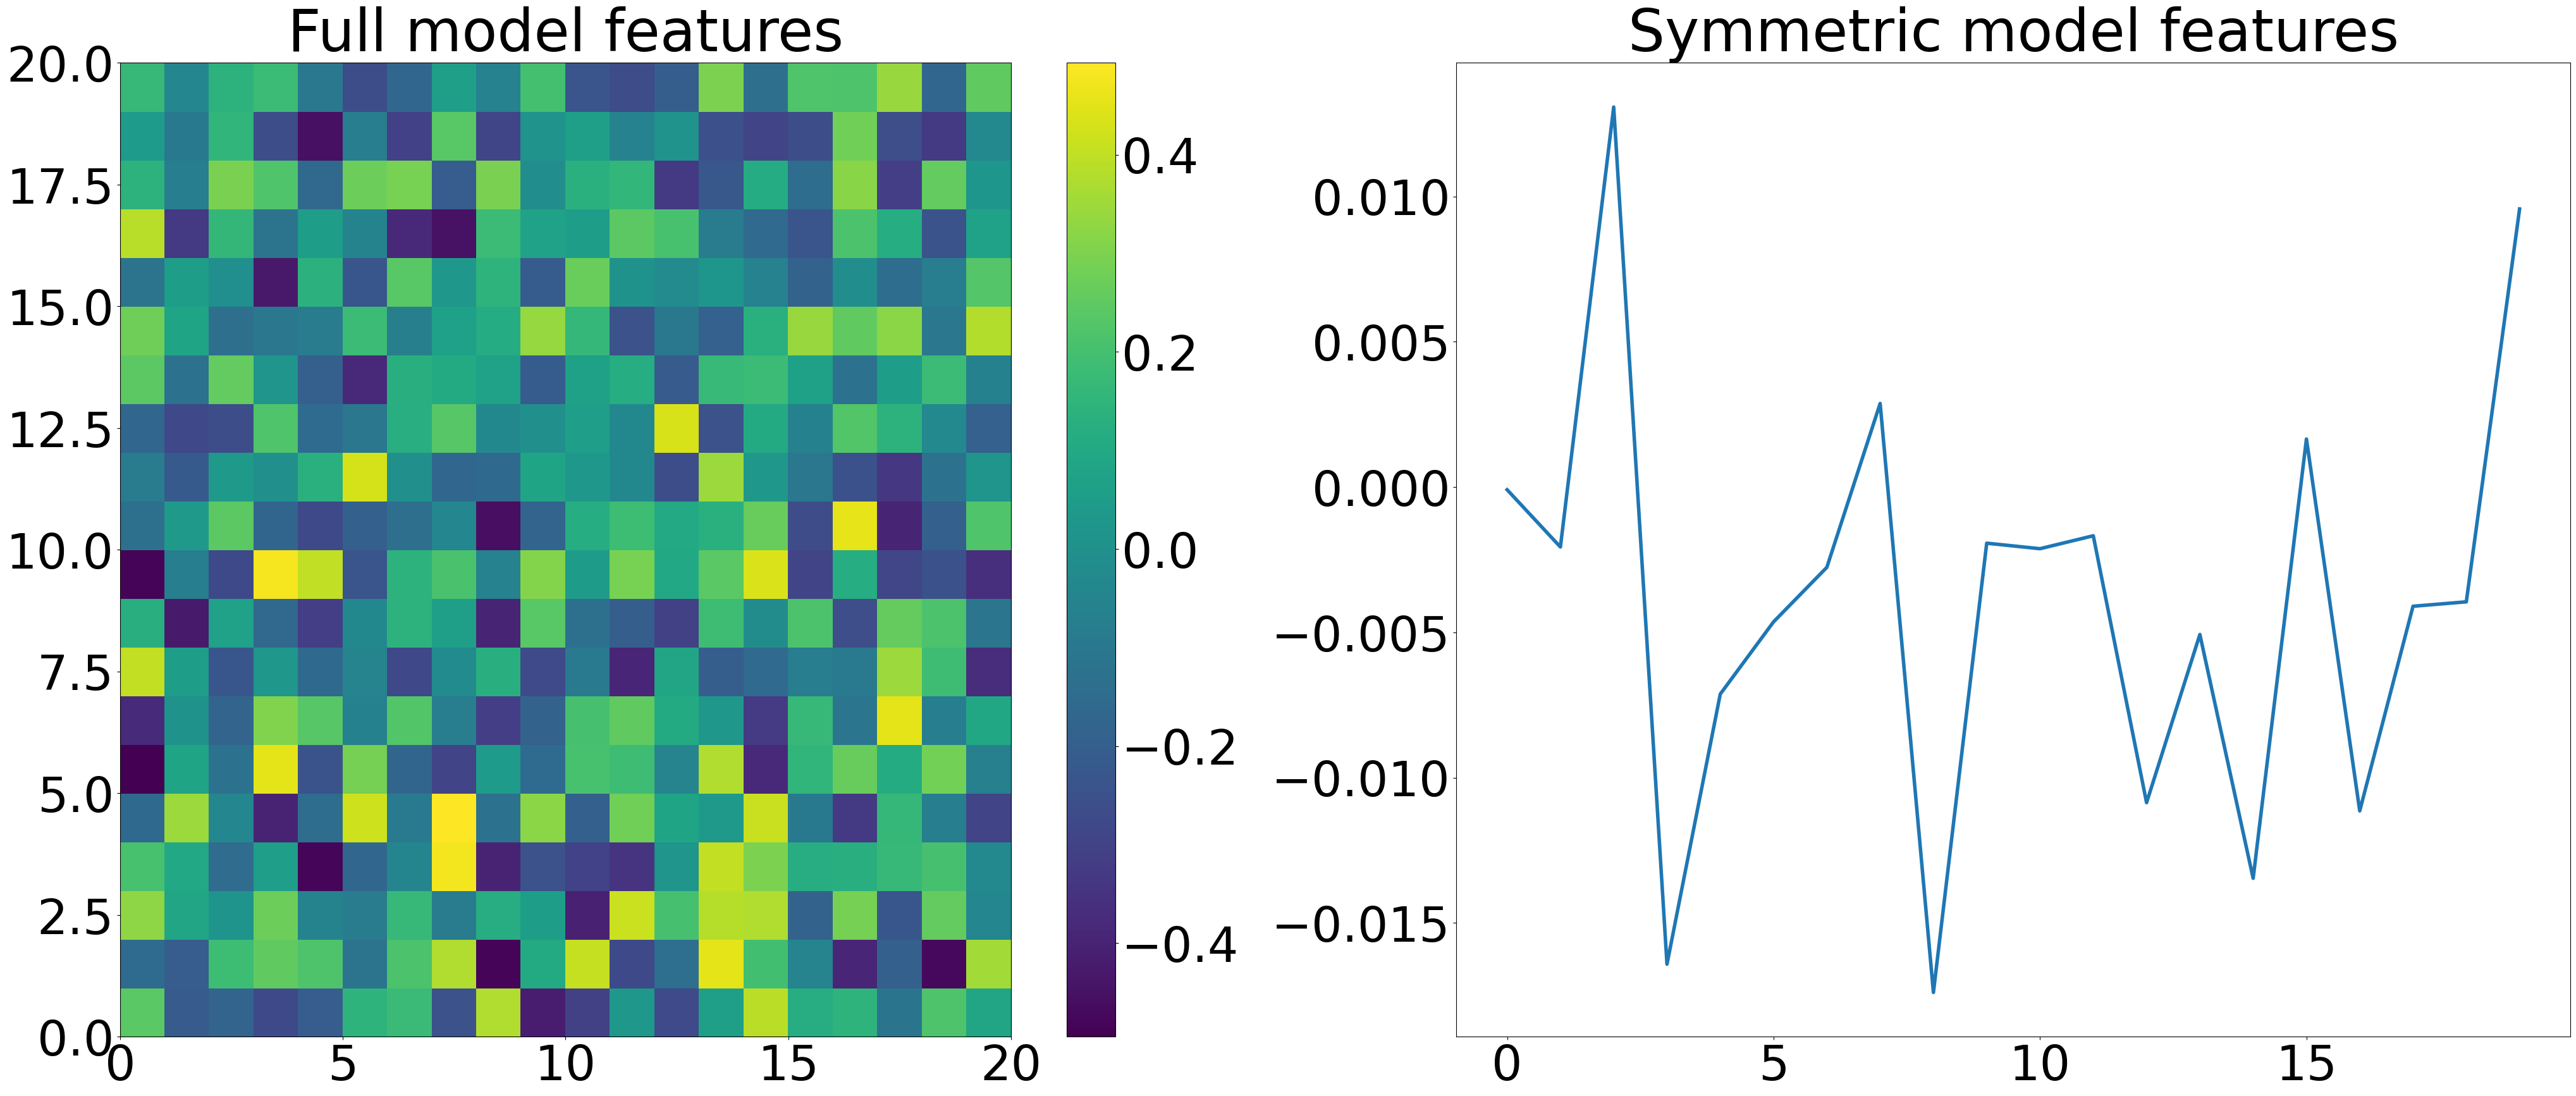

In [ ]:
#this cell plots the feature maps for NNQS and Symmetric NNQS
fig, ax = plt.subplots(1,2,figsize = (50, 20))
c = ax[0].pcolor(nn_model.linear.kernel)
ax[0].set_title('Full model features')
fig.colorbar(mappable = c, ax=ax[0])

ax[1].plot(symm_model.linear_symm.kernel[0,0])
ax[1].set_title('Symmetric model features')